# Projeto 3 - Analise de regressão (fertilidade)

### Sabrina Sampaio
### Pedro Garcia

### Introdução 
#### No Projeto 3 de Ciência dos dados tínhamos como objetivo aprender melhor a técnica de regressão. Essa técnica consiste em, basicamente, ver quais os efeitos que uma ou mais variáveis escolhidas (denominadas variáveis explicativas) tem em uma outra variável que desejamos analisar (denominada variável resposta). Quando usamos apenas uma variável explicativa para analisar uma variável resposta, chamamos essa técnica de regressão simples. E quando usamos duas ou mais variáveis explicativas denominamos a técnica de regressão múltipla, que será o foco desse projeto.

## Escolha das variáveis:
####   Para a variável resposta, tivemos que escolher entre 7 opções dadas pelo nosso professor, das quais escolhemos Fertilidade. Logo após tivemos que escolher nossas variáveis explicativas, para isso fomos ao site www.gapminder.org/tools e escolhemos as variáveis que melhor se relacionavam com Fertilidade, após uma análise mais profunda delas, decidimos usar porcentagem de garotas que completaram o ensino primário e oferta de comida (kcal/pessoa por dia) com variáveis explicativas.

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\sabri\Documents\GitHub\CD\Projeto 3


In [2]:
dados = pd.read_excel('dados.xlsx',index_col=0)

In [3]:
dados1 = dados.iloc[:,0:2]
dados2 = dados.iloc[:,(0,3)]
dados3 = dados.iloc[:,(0,4)]
dados4 = dados.iloc[:,(0,2)]

In [4]:
dados.shape

(259, 5)

In [5]:
#Retirar NaN
dados1=dados1[~np.isnan(dados1.Fertilidade)]
dados1=dados1[~np.isnan(dados1.Casamento)]

dados2=dados2[~np.isnan(dados2.Fertilidade)]
dados2=dados2[~np.isnan(dados2.Escolaridade)]

dados3=dados3[~np.isnan(dados3.Fertilidade)]
dados3=dados3[~np.isnan(dados3.Nutricao)]

dados4=dados4[~np.isnan(dados4.Fertilidade)]
dados4=dados4[~np.isnan(dados4.Pib)]

dados2.head()

,Fertilidade,Escolaridade
Pais,,
Afghanistan,6.93,18.74188
Algeria,2.51,94.21432
Argentina,2.29,99.92796
Armenia,1.40,92.92974
Aruba,1.77,88.06533


In [6]:
lnpib = np.log(dados4.Pib)

In [7]:
dados4["lnpib"] = lnpib

In [8]:
dados4N = dados4.iloc[:,(0,2)]

### Análise Descritiva

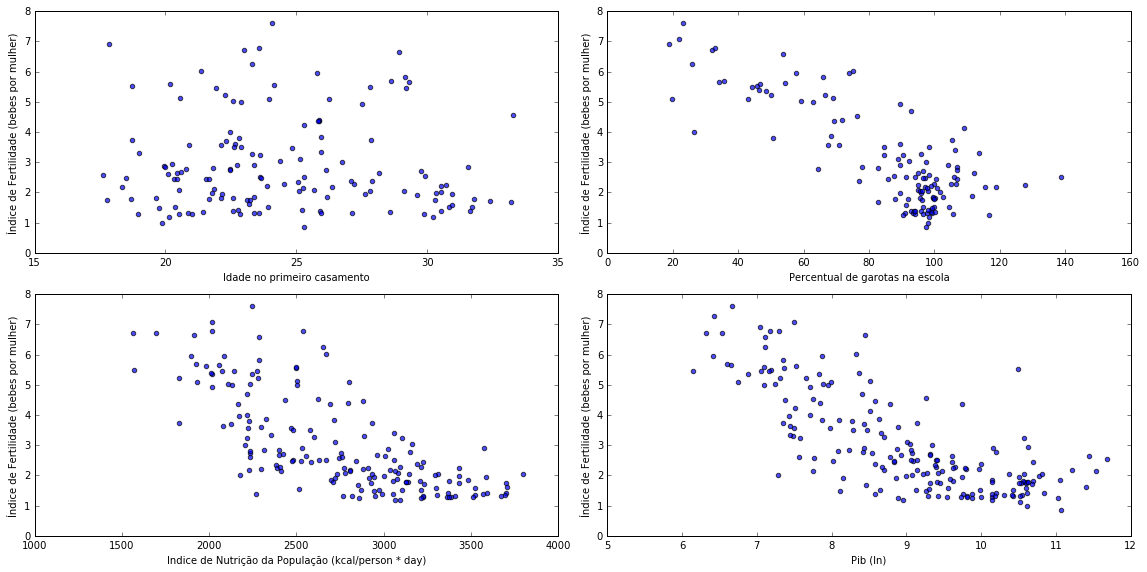

In [17]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(dados1.Casamento, dados1.Fertilidade, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("Idade no primeiro casamento")
ax[0,0].set_ylabel("Índice de Fertilidade (bebes por mulher)")

ax[0,1].scatter(dados2.Escolaridade, dados2.Fertilidade, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Percentual de garotas na escola")
ax[0,1].set_ylabel("Índice de Fertilidade (bebes por mulher)")
#ax[0,1].set_xlim(0,10000)

ax[1,0].scatter(dados3.Nutricao, dados3.Fertilidade, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("Indice de Nutrição da População (kcal/person * day)")
ax[1,0].set_ylabel("Índice de Fertilidade (bebes por mulher)")
#ax[1,0].set_xlim(0,35)

ax[1,1].scatter(dados4N.lnpib, dados4N.Fertilidade, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("Pib (ln)")
ax[1,1].set_ylabel("Índice de Fertilidade (bebes por mulher)")
#ax[1,1].set_xlim(0,100)

plt.tight_layout(1)

### Disclosure
#### Aqui temos 4 análises de variáveis acontecendo: Idade no primeiro casamento, Escolaridade feminina, Oferta de comida e Pib per capita. Sabemos, pelo site www.gapminder.org/tools, que todas estas variáveis possuem correlação visualmente notáveis, contudo, o site tem um problema na coleta e distribuição dos dados, o que resultou em uma planilha do excel defeituosa. Comparando os dados de um país x com os dados diretamente observados no site, observou-se que estavam deslocados na tabela.
#### Por exemplo: País genérico Arxyz tem 17.8 em um índice X, e o país que vem antes dele em ordem alfabética, o famoso Aqxyz, não tem dados do índice X. Ou seja, o 17.8 que pertencia ao primeiro país acaba sendo atribuido ao segundo país que não possuia numero próprio

### Visto isso, podemos entender porque parece não existir correlação entre os valores de Fertilidade e Idade no primeiro casamento, mas de fato existe (pode-se ver pelo site), e calcularemos a correlação "alterada" causada pela falha das planilhas

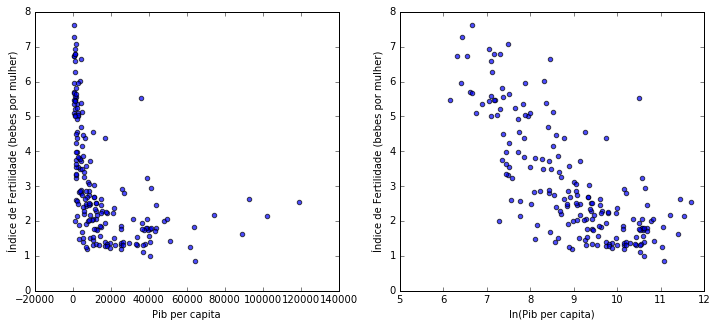

In [18]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados4.Pib, dados4.Fertilidade, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Pib per capita")
ax[0].set_ylabel("Índice de Fertilidade (bebes por mulher)")

ax[1].scatter(np.log(dados4.Pib), dados4.Fertilidade, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("ln(Pib per capita)")
ax[1].set_ylabel("Índice de Fertilidade (bebes por mulher)")

In [19]:
dados=dados[~np.isnan(dados.Fertilidade)]
dados=dados[~np.isnan(dados.Nutricao)]
dados=dados[~np.isnan(dados.Escolaridade)]
dados.shape

(116, 5)

In [20]:
dados.corr(method='pearson')

,Fertilidade,Casamento,Pib,Escolaridade,Nutricao
Fertilidade,1.000000,-0.040521,-0.474343,-0.810293,-0.720559
Casamento,-0.040521,1.000000,-0.116029,-0.073914,-0.095326
Pib,-0.474343,-0.116029,1.000000,0.435271,0.594256
Escolaridade,-0.810293,-0.073914,0.435271,1.000000,0.599965
Nutricao,-0.720559,-0.095326,0.594256,0.599965,1.000000


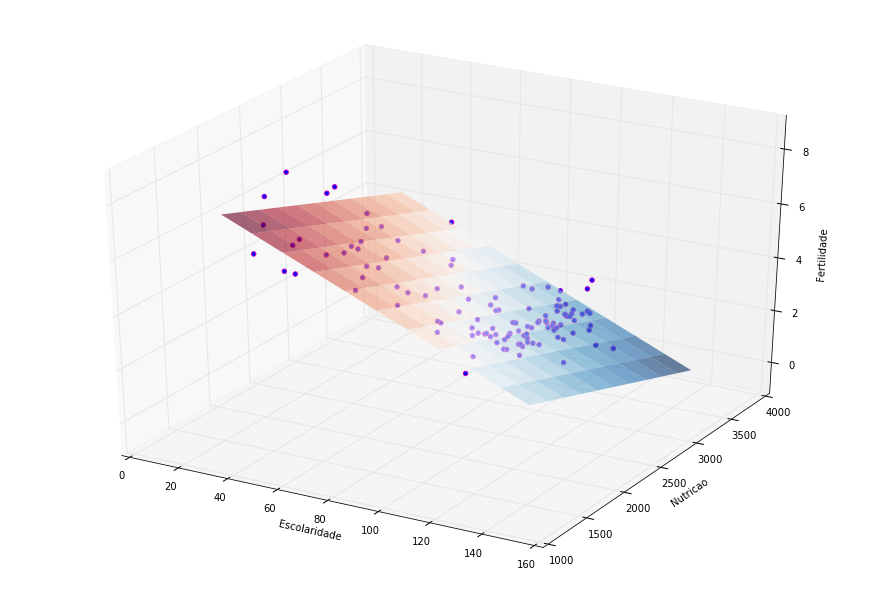

In [25]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Escolaridade', 'Nutricao']]
y = dados['Fertilidade']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Escolaridade.min(), X.Escolaridade.max(), 100), 
                       np.linspace(X.Nutricao.min(), X.Nutricao.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Escolaridade, X[resid >= 0].Nutricao, y[resid >= 0], color='m', alpha=1.0, facecolor='red')
ax.scatter(X[resid < 0].Escolaridade, X[resid < 0].Nutricao, y[resid < 0], color='m', alpha=1.0)

ax.set_xlabel('Escolaridade')
ax.set_ylabel('Nutricao')
ax.set_zlabel('Fertilidade')

### <font color='green'>Gráfico de regressão múltipla - parece estar uma regressão boa, com todas as variáveis relacionadas</font>

In [22]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.Fertilidade
X=dados.iloc[:,(3,4)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Fertilidade   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           5.20e-34
Time:                        15:30:49   Log-Likelihood:                -142.81
No. Observations:                 116   AIC:                             291.6
Df Residuals:                     113   BIC:                             299.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            9.7669      0.435     22.459      0.000         8.905    10.628
Escolaridade    -0.0398      0.004     -9.896      0.000        -0.048    -0.032
Nutricao        -0.0012      0.000     -6.137      0.000        -0.002    -0.001
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.151
Skew:                           0.244   Prob(JB):                        0.562
Kurtosis:                       3.032   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(5.5682917009460029,
 0.35051554524574974,
 1.1093047396230611,
 0.35966851016889195)

## Analise da tabela:

#### Agora que temos uma quantidade grande de informação sobre nossa regressão, podemos fazer as primeiras afirmações. Primeiro analisamos o R^2, que mostra quantos porcento dos nossos pontos são representados corretamente pela regressão. Quanto maior o R^2, melhor sua regressão, e o nosso esta razoavelmente alto (0.74). Além disso, o R^2 ajustado define se suas variáveis estão explicando bem o erro calculado no R^2 normal. Quando ele é baixo (0%), quer dizer que você não está explicando o erro corretamente, e sua regressão está ruim. O nosso é alto, (0.7), portanto continuamos com a percepção que a regressão múltipla está boa.
#### Após olhar o R^2, olhamos a F statistics. Ela mostra a chance do seu modelo ter Betas iguais a 0, ou seja, de você não rejeitar H0. A nossa F statistics é praticamente 0, o que nos mantém a ideia de uma regressão completa, onde todas as variáveis estão ajudando (e nenhuma poderia ser cortada fora).
#### Olhamos também o indice de Durbin-Watson, que analisa se os resíduos são independentes. Perto de 2, quer dizer que eles são totalmente independentes, o que o nosso teste verifica (ele deu 1.8).
#### Infelizmente, nada dura para sempre, e percebemos uma falta grave em nosso modelo de regressão ao analisar a probabilidade de Omnibus e a probabilidade JB. Elas mostram se os erros tem variação nula ou se eles variam com o tempo. Em uma regressão com homocedasticidade, a média dos erros é 0 e a variação entre eles é nula, ou seja, o erro do Brasil é o mesmo erro da Nigéria. No nosso caso, essas probabilidades eram quase 0.5, o que significa que existe 50% de chance do nosso modelo, ao ser resumido à essa regressão, apresentar heterocedasticidade.

## Conclusão:

### Ao olharmos a tabela, podemos ver que β0 = 9.7669; β1 = -0.398 e β2 = -0.0012. Sendo β0 a constante da equação da reta, β1 o coeficiente da variável escolaridade e β2 o coeficiente da variável nutrição.

### Dos coeficientes achados acima, podemos intepretar que: 

### 1 - Para cada 1% de garotas  que completam o primario, o índice de fertilidade do país, ou seja, quantos bebês cada mulher tem, cai em 0,398 bebes.

### 2 - Para cada caloria que cada pessoa come por dia, o índice de fertilidade cai em 0,0012. Ou seja, a fertilidade diminui quando o país é bem nutrido, pois isso também indica que ele é desenvolvido, e sabemos que países desenvolvidos tem menor taxa de fertilidade, por fatores diversos (mulheres trabalhando, estudando, etc)

### <font color ='dark green'> Resumindo, temos uma regressão boa, onde todas as variáveis tem um papel importante, e nenhuma delas afeta negativamente. Por outro lado, nossa média dos erros não é 0, então podemos supor que o modelo não possui homocedasticidade. Assim, finalizamos o estudo breve deste modelo, e afirmamos que Fertilidade, Escolaridade e Nutrição são correlacionáveis.</font>